In [41]:
import pandas as pd
import numpy as np
import os
from dotenv import dotenv_values, find_dotenv
import datetime as dt
import preparecorrelations as pc
pd.set_option('display.max_columns', None)

In [42]:
import importlib
importlib.reload(pc)

<module 'preparecorrelations' from 'c:\\Users\\fuem\\Documents\\correlationmodule\\preparecorrelations.py'>

# module demo: various data and detrending techniques

In [9]:
# this looks for your configuration file and then reads it as a dictionary
config = dotenv_values(find_dotenv())

# set path using the dictionary key for which one you want
correlationpath = os.path.abspath(config["CORRELATIONDATA"]) + '\\'
cleandatapath = os.path.abspath(config["CLEANDATA"]) + '\\'

In [10]:
xlsx = pd.ExcelFile(correlationpath + "gdp_consumption_haver_final.xlsx")

rgdp = pd.read_excel(xlsx, 'Real GDP')
rc = pd.read_excel(xlsx, 'Real C')

oecdemployment = pc.get_from_oecd("STLABOUR/AUS+AUT+BEL+CAN+DNK+FIN+FRA+DEU+GRC+IRL+ITA+JPN+NOR+NLD+NZL+PRT+ESP+SWE+CHE+GBR+USA.LREM64TT.STSA.Q/OECD")
oecdunemployment = pc.get_from_oecd("STLABOUR/AUS+AUT+BEL+CAN+DNK+FIN+FRA+DEU+GRC+IRL+ITA+JPN+NOR+NLD+NZL+PRT+ESP+SWE+CHE+GBR+USA.LRUN64TT.STSA.Q/OECD")

imfipi = pc.get_from_imf('CompactData/IFS/Q..AIP_SA_IX')


In [11]:
# the developed countries included in the gdp/consumption series
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Denmark", "Finland", "France", "Germany", "Greece", "Iceland", "Ireland", 
                  "Italy", "Japan", "Luxembourg", "Netherlands", "Norway", "Portugal", "Spain", "Sweden", "Switzerland", 
                  "Turkey", "U.K.", "U.S."] 

# the EMEs included in the gdp/consumption series
MSCI_EM_countries = ["Brazil", "Chile", "China", "Colombia", "Czech Republic", "Egypt", "Greece", "Hungary", "India", 
                     "Indonesia", "South Korea", "Kuwait", "Malaysia", "Mexico", "Peru", "Philippines", "Poland", "Qatar", 
                     "Saudi Arabia", "South Africa", "Taiwan", "Thailand", "Turkey", "United Arab Emirates"]

# some countries we wanted to remove from the GDP/consumption series for not having enough data (decided previously)
to_remove = ['Egypt', 'Saudi Arabia', 'Malaysia', 'Colombia', 'Qatar', 'Kuwait', 'China']

# the countries that will be used for the gdp/consumption stuff
original_countries = list(set(oecd_countries + MSCI_EM_countries) - set(to_remove))

# the countries that will be used for the employment/unemployment/industrial production stuff (from frankel and rose paper)
frankelrosecountries = ['AUS', 'AUT', 'BEL', 'CAN', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC', 'IRL', 'ITA', 'JPN', 'NOR', 'NLD', 'NZL', 'PRT', 'ESP', 'SWE', 'CHE', 'GBR', 'USA']

## Haver data: Real GDP, HP Filter

In [12]:
# seasonally adjusting the gdp series (imf/oecd data are already seasonally adjusted)
rgdp_sa = pc.SeasonalAdjustment(pc.fixCols(rgdp, original_countries))

c:\Users\fuem\.conda\envs\myenv\Lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning: NOTE: Unable to test LS2020.2 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS2020.3 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

          so the standard errors and the correlation matrix of the ARMA
          parameters will not be printed out.


 NOTE: Unable to test LS2008.4 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS2020.2 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other reg

In [13]:
# show the detrended data

rgdp_detrend = pc.Prepare_Correlations(rgdp_sa, detrending="HP Filter", countries=list(rgdp_sa.columns)).detrend(start_date="1998-01-01", end_date="2021-12-31")

rgdp_detrend.data.tail()

,AUS,AUT,BEL,CAN,DNK,FIN,FRA,DEU,GRC,ISL,...,IDN,KOR,MEX,PER,PHL,POL,ZAF,TWN,THA,TUR
date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,-0.006839,-0.034697,-0.020587,-0.008219,-0.016501,-0.007959,-0.014218,-0.008470,-0.038582,-0.035878,...,-0.016025,-0.014039,-0.009491,-0.001225,-0.041663,-0.026234,-0.005990,0.005214,-0.018284,0.008710
2021-01-01,0.007023,-0.040516,-0.010225,0.002295,-0.018020,-0.014397,-0.013196,-0.023081,0.003967,-0.024683,...,-0.009807,-0.001409,-0.002360,0.021121,-0.031369,-0.019726,0.005607,0.029754,-0.016387,0.022995
2021-04-01,0.009913,-0.000377,0.004919,-0.007714,-0.002474,0.001154,-0.002404,-0.001939,0.012766,-0.000505,...,-0.012693,0.001934,0.010403,0.024913,-0.036140,-0.008252,0.019332,0.011702,-0.015773,-0.013848
2021-07-01,-0.012174,0.032541,0.023173,0.003378,0.006495,0.010015,0.027470,0.011868,0.029161,-0.000728,...,-0.023498,0.000836,0.004429,0.060348,-0.010720,0.007099,0.003567,0.007841,-0.021880,0.035527
2021-10-01,0.018754,0.019176,0.026304,0.017298,0.031741,0.015031,0.034792,0.009451,0.033290,-0.003675,...,0.007304,0.006990,0.010652,0.015421,0.014687,0.017687,0.016061,0.009898,-0.000818,0.051017


In [14]:
# show the correlation matrix

rgdpcorrelations = rgdp_detrend.get_correlationmatrix()

rgdpcorrelations

,USA,MEX,BEL,CAN,GBR,FRA,DNK,HUN,AUT,ZAF,...,TUR,LUX,THA,ISL,KOR,BRA,TWN,GRC,IRL,IDN
USA,1.000000,0.918096,0.907854,0.902947,0.888706,0.857161,0.848856,0.847672,0.842206,0.839220,...,0.682134,0.672836,0.627790,0.607812,0.603793,0.577605,0.540587,0.482172,0.473307,0.354208
MEX,0.918096,1.000000,0.911767,0.917000,0.905838,0.883857,0.829223,0.857352,0.867716,0.904258,...,0.666265,0.656257,0.647998,0.640127,0.594537,0.598535,0.433907,0.489255,0.437614,0.456655
BEL,0.907854,0.911767,1.000000,0.890056,0.938824,0.953072,0.806018,0.842316,0.917148,0.892798,...,0.609940,0.687071,0.620712,0.563099,0.659848,0.634180,0.444030,0.574462,0.453749,0.475976
CAN,0.902947,0.917000,0.890056,1.000000,0.876441,0.895835,0.781543,0.859490,0.868690,0.889647,...,0.612896,0.600225,0.610395,0.575220,0.627902,0.699747,0.417210,0.446685,0.308742,0.487912
GBR,0.888706,0.905838,0.938824,0.876441,1.000000,0.931814,0.771252,0.894971,0.889862,0.925039,...,0.603254,0.617159,0.634845,0.589733,0.522185,0.557895,0.312487,0.624738,0.403150,0.479769
FRA,0.857161,0.883857,0.953072,0.895835,0.931814,1.000000,0.771765,0.822033,0.914174,0.885474,...,0.585344,0.627232,0.594056,0.546500,0.558974,0.640300,0.333629,0.526300,0.368111,0.440882
DNK,0.848856,0.829223,0.806018,0.781543,0.771252,0.771765,1.000000,0.777366,0.829404,0.734807,...,0.634963,0.677362,0.493647,0.685422,0.619305,0.425693,0.511811,0.392924,0.499816,0.317108
HUN,0.847672,0.857352,0.842316,0.859490,0.894971,0.822033,0.777366,1.000000,0.836240,0.877889,...,0.626699,0.528695,0.582281,0.624920,0.454164,0.569603,0.324456,0.606855,0.453428,0.509491
AUT,0.842206,0.867716,0.917148,0.868690,0.889862,0.914174,0.829404,0.836240,1.000000,0.844594,...,0.532475,0.632177,0.599263,0.671554,0.610324,0.570082,0.329595,0.503546,0.367606,0.470159
ZAF,0.839220,0.904258,0.892798,0.889647,0.925039,0.885474,0.734807,0.877889,0.844594,1.000000,...,0.617878,0.592791,0.592087,0.607104,0.476668,0.659437,0.289539,0.583527,0.365208,0.553559


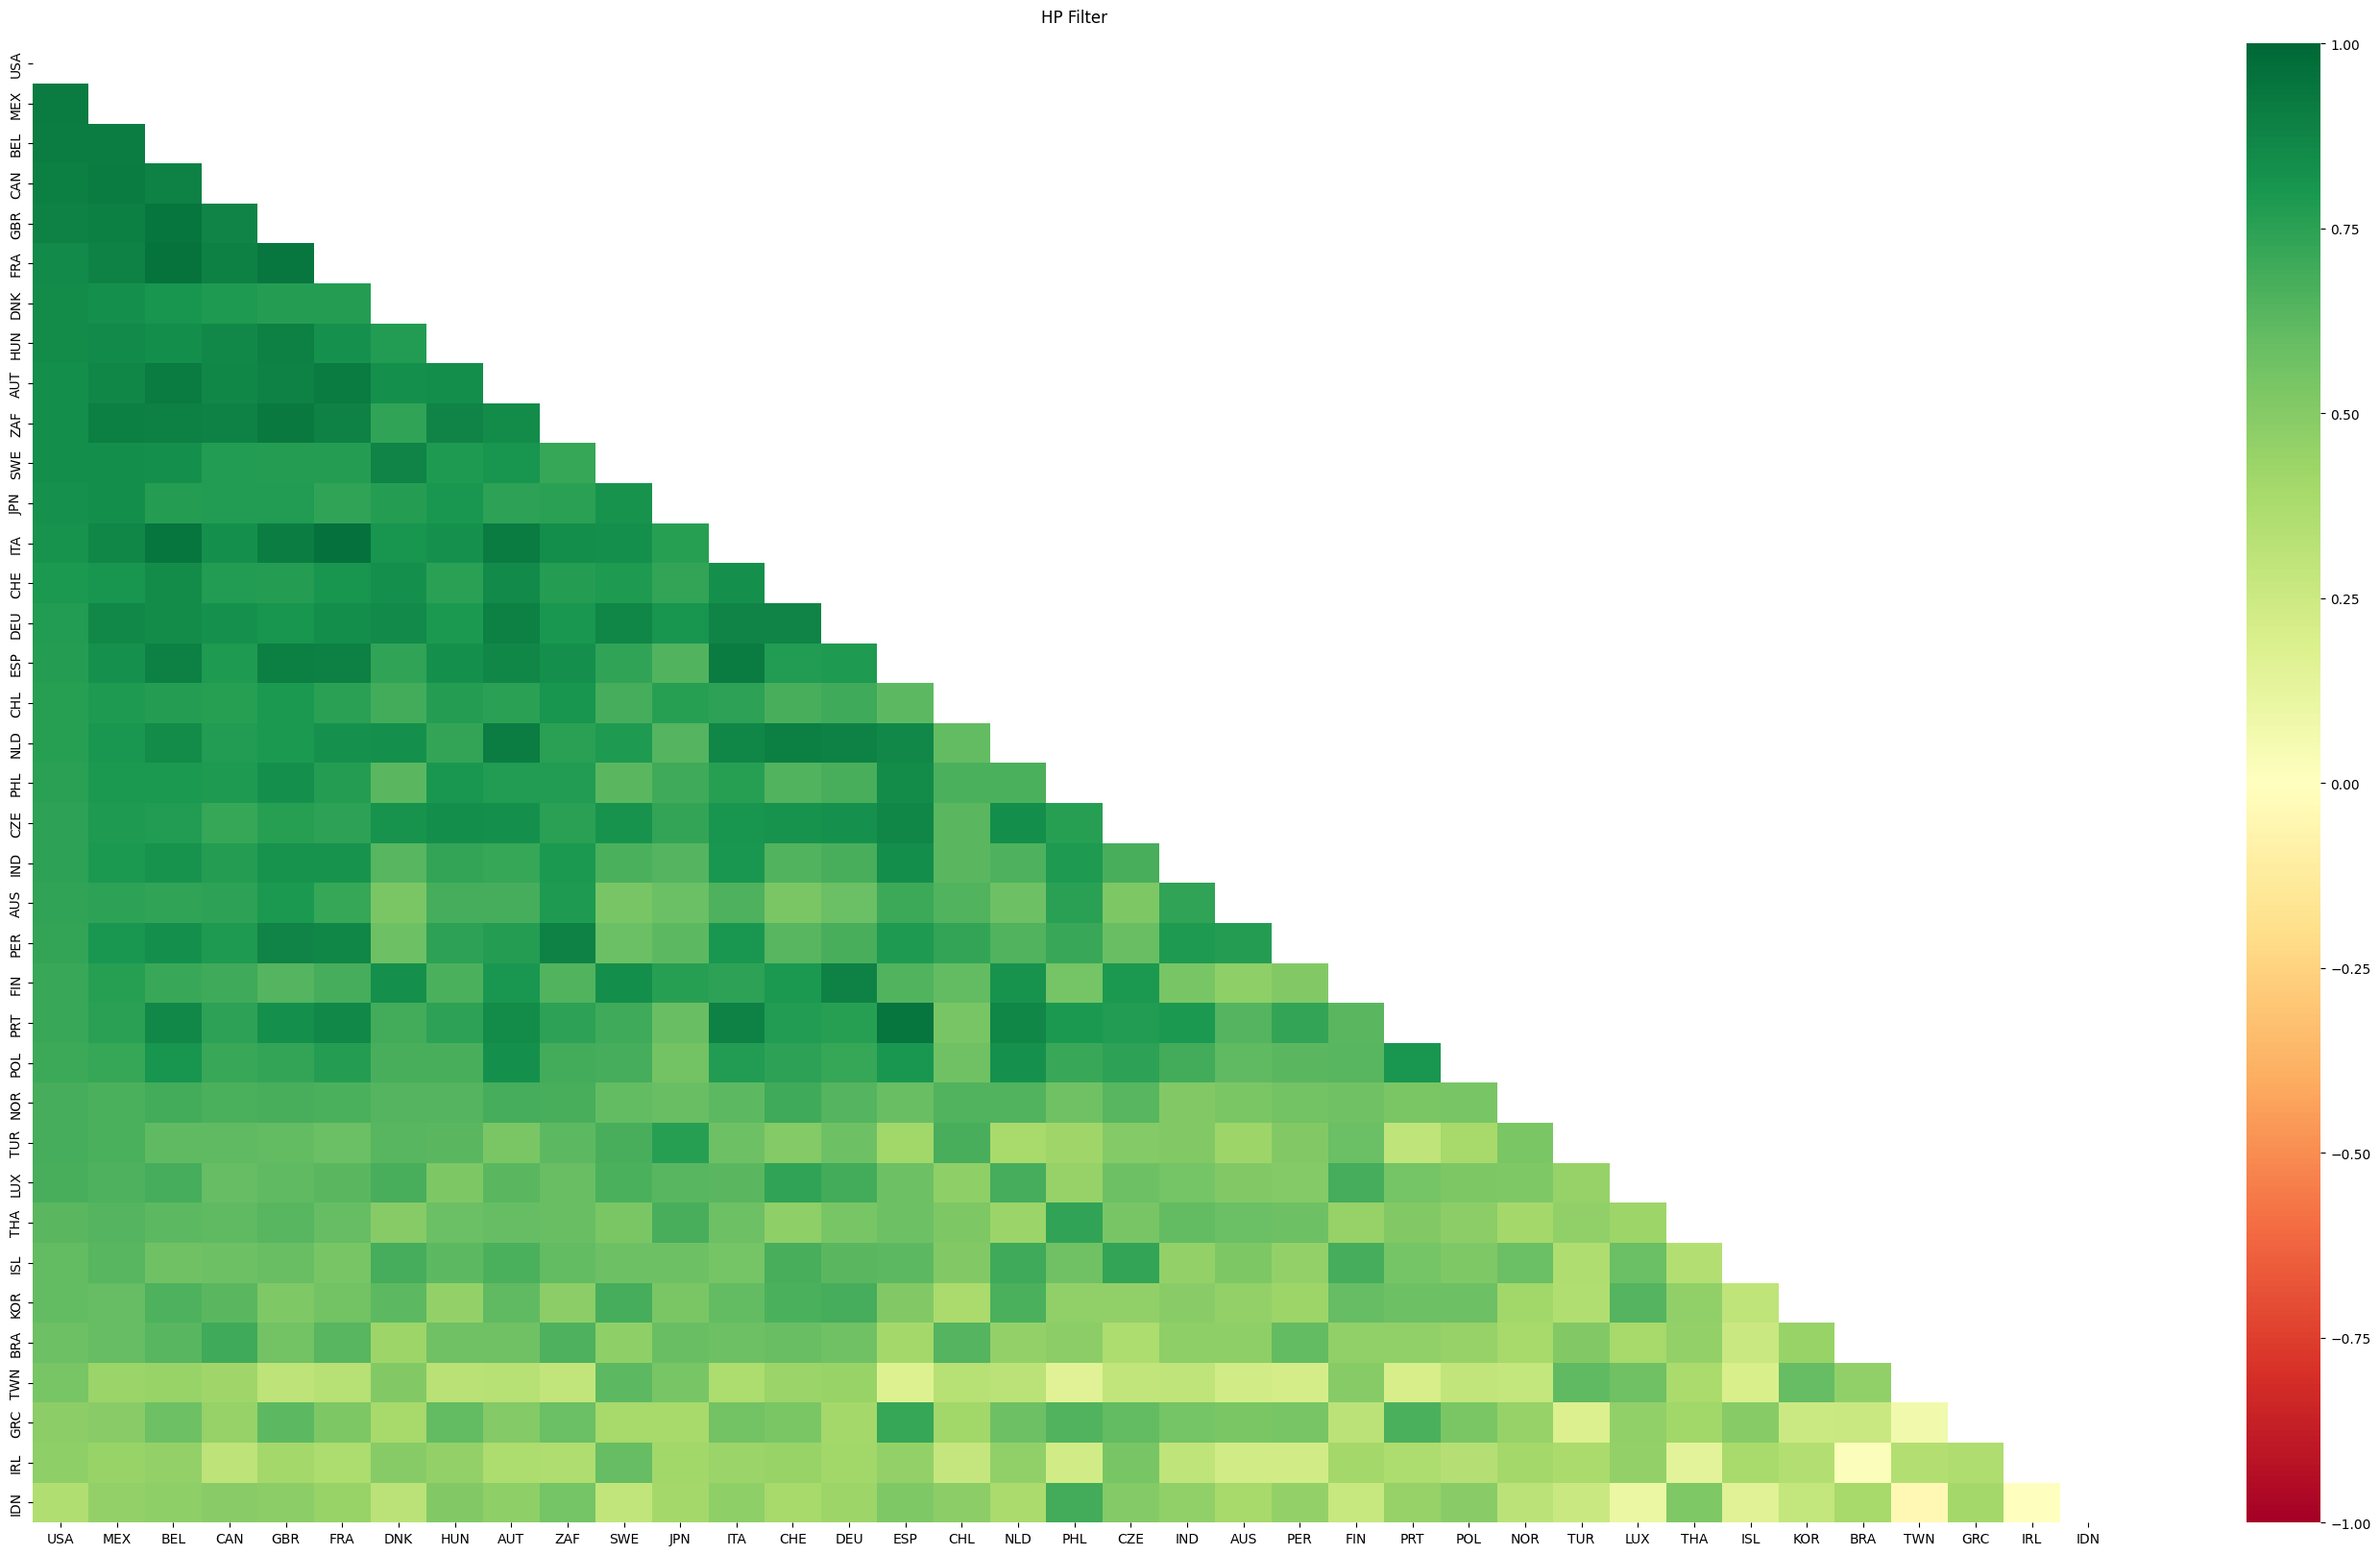

In [15]:

# show the heatmap visualisation

rgdpheatmap = rgdp_detrend.get_heatmap()

In [16]:
# show the reshaped version

rgdpreshaped = rgdp_detrend.get_organized()

rgdpreshaped.tail()

,iso3_firstcountry,iso3_secondcountry,correlation
1256,TWN,IRL,0.350499
1257,TWN,IDN,-0.045611
1293,GRC,IRL,0.366505
1294,GRC,IDN,0.403062
1331,IRL,IDN,0.006740


## OECD data: employment rate, first differences

In [17]:
# show the detrended data

oecdemploymentdetrend = pc.Prepare_Correlations(oecdemployment, detrending="first difference", countries=frankelrosecountries).detrend(start_date="1998-01-01", end_date="2021-12-31")

oecdemploymentdetrend.data.tail()

,AUS,AUT,BEL,CAN,CHE,DEU,DNK,ESP,FIN,FRA,...,GRC,IRL,ITA,JPN,NLD,NOR,NZL,PRT,SWE,USA
date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,0.020318,-0.002188,-0.007787,0.024750,0.006280,0.007526,0.006592,0.006613,0.004877,0.005314,...,-0.031343,0.004923,0.005239,0.004007,0.004723,0.002089,0.005907,0.011983,0.002708,0.022168
2021-01-01,0.010702,-0.005474,-0.005432,-0.000923,-0.015577,0.000594,-0.004561,0.001981,0.002932,0.004690,...,-0.000928,-0.005137,-0.011190,0.003236,0.002325,0.005203,0.007751,-0.004662,-0.002493,0.007604
2021-04-01,0.011130,0.008935,0.022043,0.006443,-0.007100,0.008386,0.021949,0.021209,0.016411,0.008742,...,0.063538,0.045351,0.022103,0.000797,0.005187,0.015143,0.009879,0.020921,0.011478,0.007637
2021-07-01,-0.004767,0.015636,0.018051,0.018633,0.012525,0.014019,-0.001248,0.013868,-0.000173,0.006546,...,0.027920,0.034211,0.015370,0.002731,0.007259,0.012238,0.015087,0.011355,0.003977,0.012247
2021-10-01,0.006611,0.004499,-0.003138,0.014749,0.008872,0.005258,0.013455,0.007841,0.010189,0.002488,...,0.007642,0.013380,0.009849,-0.000868,0.005354,0.006282,0.002519,0.001166,0.006201,0.011098


In [18]:
# show the correlation matrix

oecdemploymentmatrix = oecdemploymentdetrend.get_correlationmatrix()

oecdemploymentmatrix

,USA,CAN,AUS,IRL,ESP,AUT,GRC,ITA,FRA,FIN,...,JPN,PRT,SWE,NOR,BEL,DNK,NLD,GBR,DEU,NZL
USA,1.000000,0.952678,0.865939,0.761113,0.698940,0.647747,0.644433,0.590222,0.522463,0.509904,...,0.492607,0.474288,0.471264,0.376168,0.276563,0.251296,0.231825,0.202697,0.197400,0.153473
CAN,0.952678,1.000000,0.837190,0.713424,0.661237,0.672434,0.690924,0.569392,0.466940,0.484861,...,0.380602,0.426351,0.412299,0.311956,0.272849,0.195947,0.202013,0.081529,0.254700,0.095444
AUS,0.865939,0.837190,1.000000,0.643045,0.660141,0.577390,0.557244,0.513649,0.528755,0.517981,...,0.440501,0.444762,0.452895,0.354207,0.276312,0.196838,0.199826,0.152152,0.209613,0.147777
IRL,0.761113,0.713424,0.643045,1.000000,0.819638,0.585586,0.650525,0.680256,0.628388,0.631562,...,0.507957,0.629589,0.643604,0.508235,0.382390,0.448651,0.176374,0.392845,0.385144,0.382425
ESP,0.698940,0.661237,0.660141,0.819638,1.000000,0.513562,0.693735,0.739635,0.637405,0.606200,...,0.469300,0.720150,0.584604,0.371086,0.344418,0.478690,0.093941,0.350148,0.379150,0.351729
AUT,0.647747,0.672434,0.577390,0.585586,0.513562,1.000000,0.584829,0.312842,0.440422,0.466789,...,0.345400,0.313493,0.412917,0.389127,0.350312,0.208723,0.179251,0.103127,0.315359,0.042713
GRC,0.644433,0.690924,0.557244,0.650525,0.693735,0.584829,1.000000,0.589863,0.391913,0.375160,...,0.256153,0.455686,0.279358,0.287873,0.344705,0.333184,0.190426,0.104934,0.148435,0.082469
ITA,0.590222,0.569392,0.513649,0.680256,0.739635,0.312842,0.589863,1.000000,0.572616,0.480421,...,0.265204,0.621077,0.542798,0.396862,0.288034,0.490624,0.283099,0.336270,0.382967,0.314531
FRA,0.522463,0.466940,0.528755,0.628388,0.637405,0.440422,0.391913,0.572616,1.000000,0.754840,...,0.470553,0.736590,0.630568,0.446832,0.354284,0.493894,-0.019009,0.384354,0.486553,0.293736
FIN,0.509904,0.484861,0.517981,0.631562,0.606200,0.466789,0.375160,0.480421,0.754840,1.000000,...,0.368729,0.476649,0.674878,0.484378,0.261265,0.473047,0.166854,0.336527,0.449516,0.164825


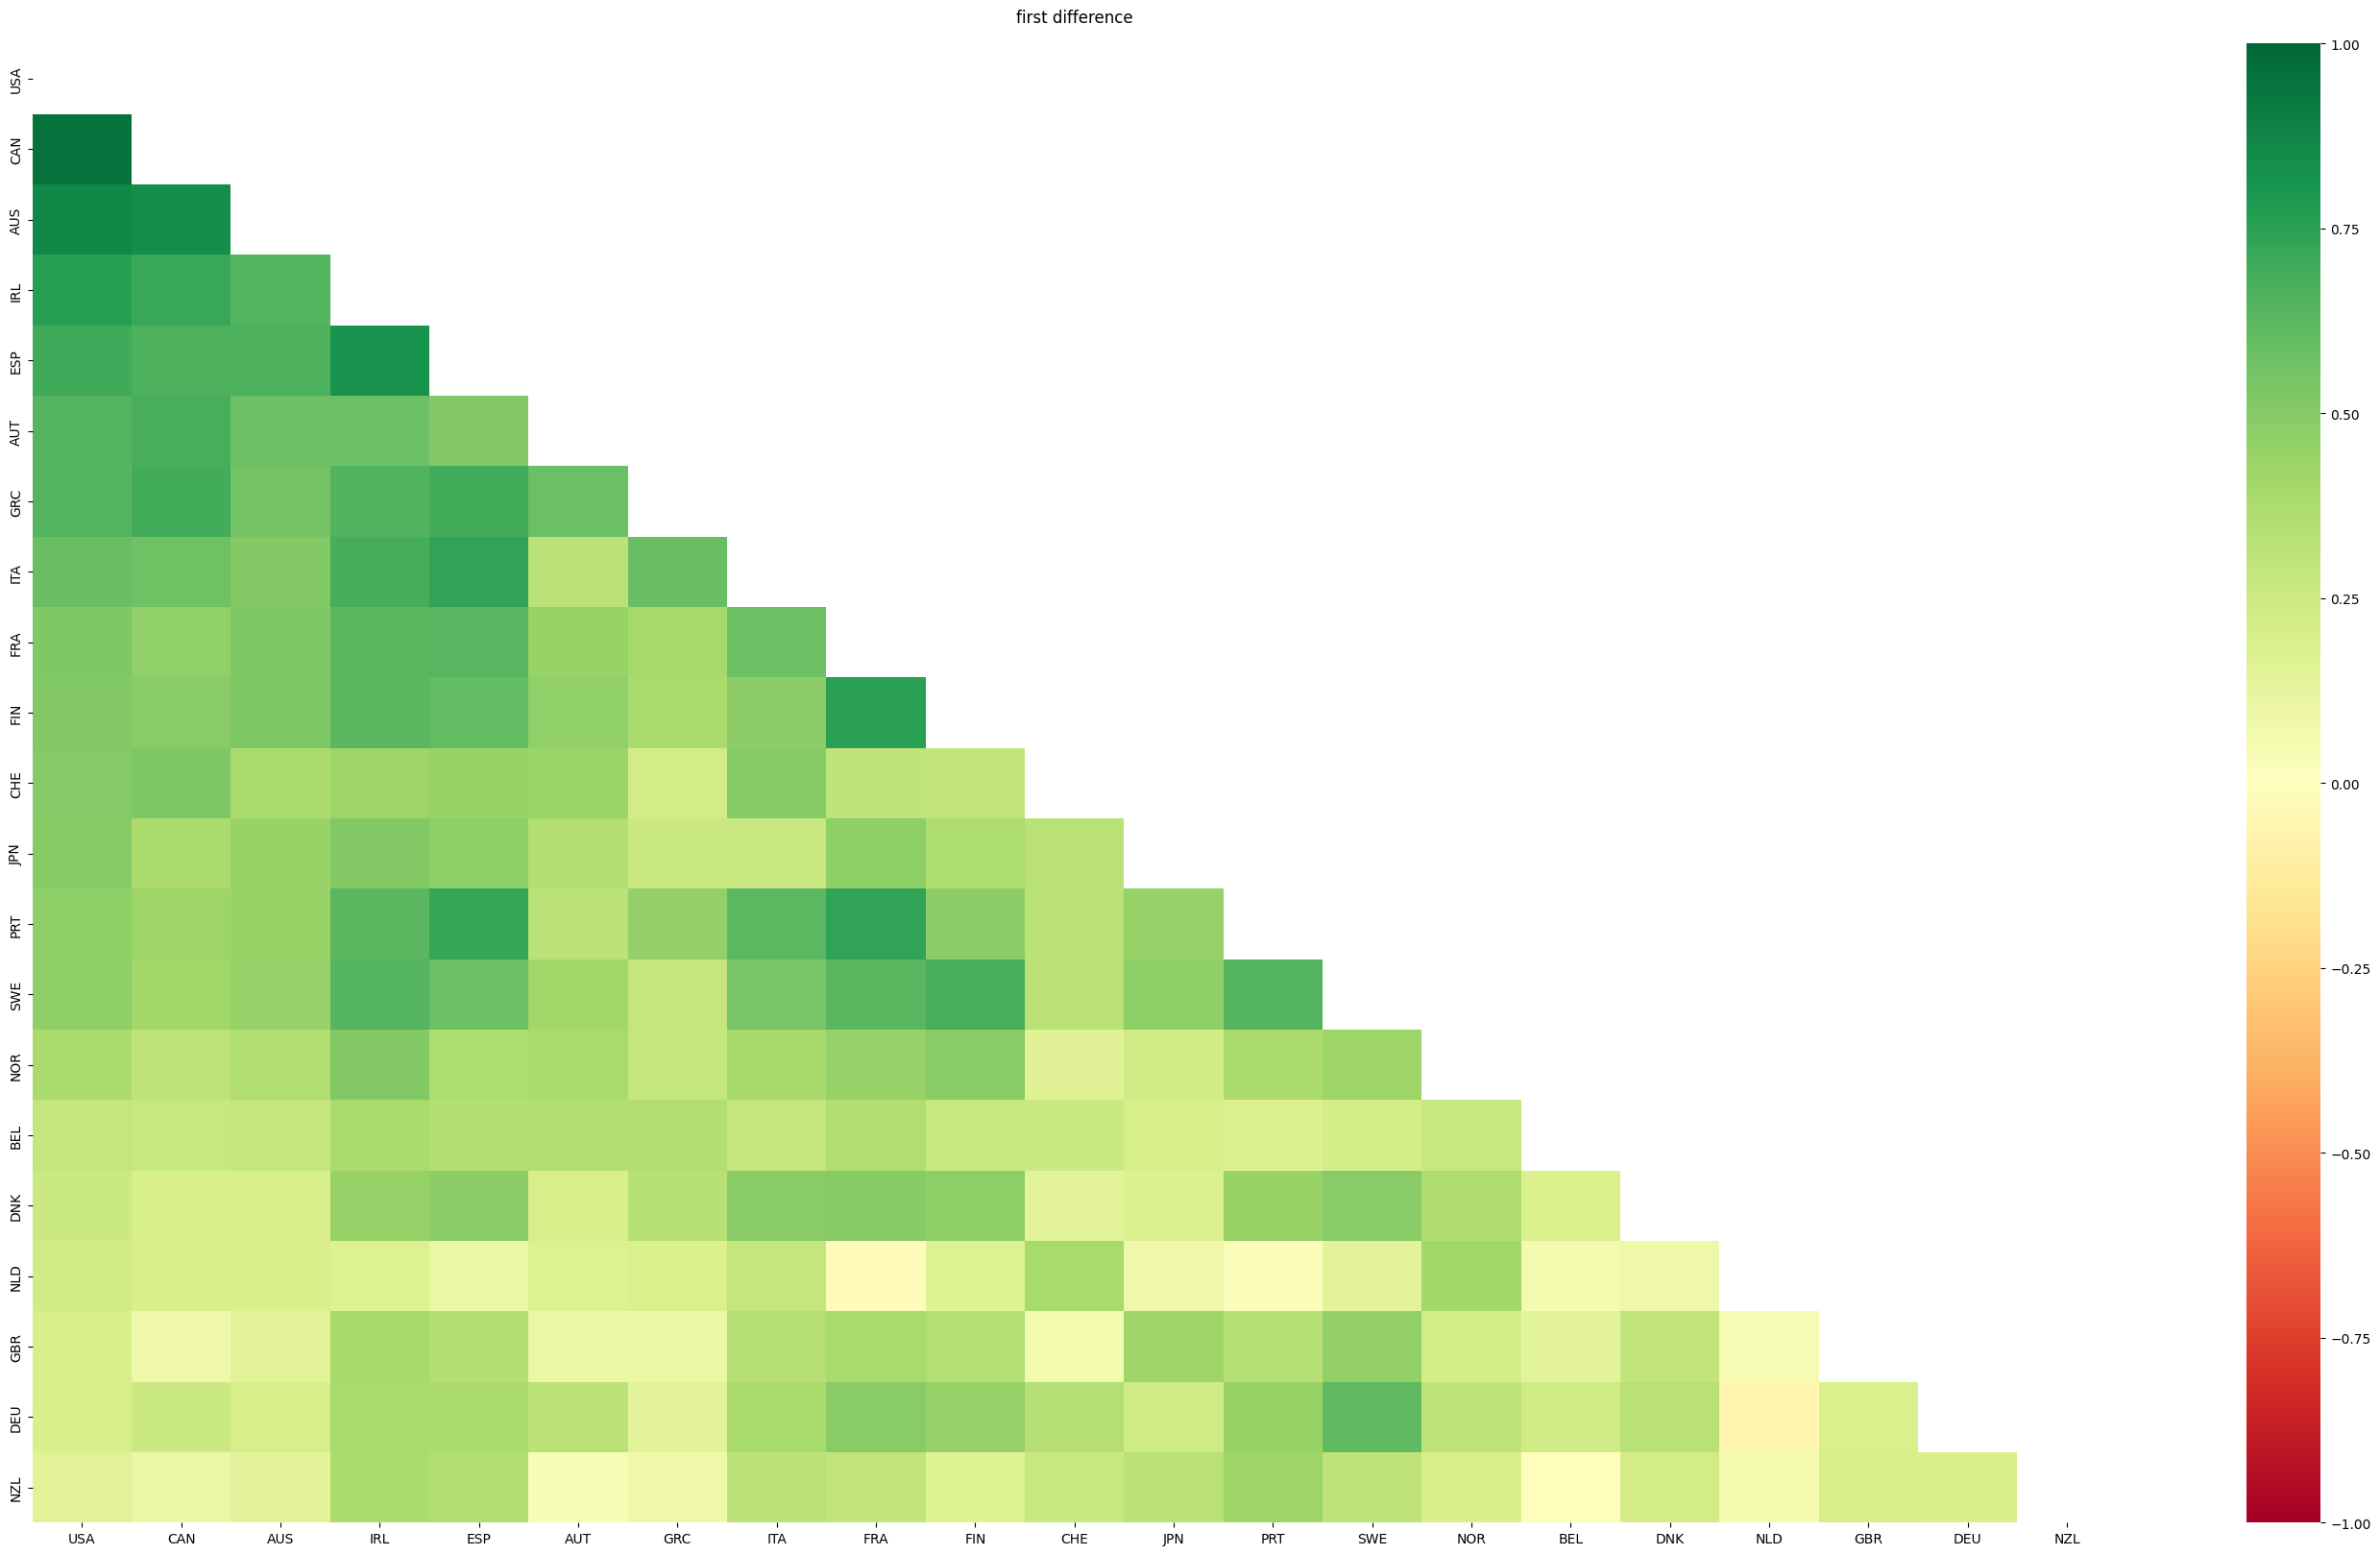

In [19]:
# show the heatmap visualisation

oecdemploymentheatmap = oecdemploymentdetrend.get_heatmap()

In [20]:
# show the reshaped version: 

oecdemploymentreshaped = oecdemploymentdetrend.get_organized()

oecdemploymentreshaped.tail()


,iso3_firstcountry,iso3_secondcountry,correlation
376,NLD,DEU,-0.067122
377,NLD,NZL,0.060215
397,GBR,DEU,0.188856
398,GBR,NZL,0.209660
419,DEU,NZL,0.200005


## IMF data: industrial production index, linear detrending

double check if i'm using the right data (should have a nice full series for all the countries?)

In [21]:
imfipidetrend = pc.Prepare_Correlations(imfipi, detrending="linear detrending", countries=frankelrosecountries).detrend(start_date="2000-01-01", end_date="2021-12-31")

imfipidetrend.data.tail()

,AUT,AUS,BEL,CAN,CHE,DEU,DNK,ESP,FIN,FRA,...,GRC,IRL,ITA,JPN,NLD,NOR,NZL,PRT,SWE,USA
date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,-0.025409,-0.004551,-0.024625,0.012318,-0.020333,-0.053564,0.018416,0.062526,-0.000136,0.009615,...,0.084492,0.238299,0.038333,-0.045025,-0.040450,0.038247,0.009412,0.059891,0.039099,-0.037263
2021-01-01,-0.015818,-0.053862,0.013492,0.021887,0.017126,-0.059146,0.062995,0.070603,0.014578,0.010167,...,0.139382,0.307168,0.062543,-0.016733,-0.025389,0.072962,0.013371,0.053977,0.055399,-0.030721
2021-04-01,-0.005883,-0.057197,0.098616,0.015283,0.039161,-0.067846,0.059700,0.060519,0.019299,0.007665,...,0.161779,0.255422,0.071672,-0.015054,-0.011545,0.079603,0.033684,0.023516,0.063547,-0.016220
2021-07-01,0.012246,-0.062273,0.085135,0.028318,0.031478,-0.098038,0.108732,0.060141,0.038375,0.008892,...,0.180184,0.303085,0.085860,-0.033930,-0.004306,0.110702,-0.035773,0.023706,0.059056,-0.008840
2021-10-01,0.051735,-0.068893,0.058698,0.042329,0.025140,-0.075606,0.148337,0.094714,0.069005,0.010458,...,0.214566,0.278517,0.098044,-0.025227,-0.001597,0.084794,0.007659,0.055126,0.075011,0.001608


In [22]:
# show the correlation matrix

imfipimatrix = imfipidetrend.get_correlationmatrix()

imfipimatrix

,USA,JPN,DEU,FRA,AUT,ITA,SWE,ESP,NZL,PRT,...,FIN,AUS,DNK,NLD,BEL,CHE,GBR,GRC,IRL,NOR
USA,1.000000,0.841215,0.799439,0.768083,0.714980,0.596314,0.558480,0.531214,0.523404,0.462413,...,0.444380,0.438057,0.432231,0.426010,0.399130,0.361861,0.195465,0.145447,0.034092,-0.016829
JPN,0.841215,1.000000,0.801586,0.791771,0.792534,0.709933,0.718626,0.676468,0.687526,0.526182,...,0.670424,0.641060,0.434336,0.578133,0.587378,0.425711,0.264084,0.306117,0.072553,0.025367
DEU,0.799439,0.801586,1.000000,0.682123,0.789947,0.479366,0.448587,0.351775,0.387898,0.279313,...,0.448972,0.732564,0.090545,0.659523,0.549831,0.461807,-0.144580,-0.122272,-0.224028,-0.333578
FRA,0.768083,0.791771,0.682123,1.000000,0.780210,0.909149,0.809095,0.836748,0.689244,0.815201,...,0.614427,0.442721,0.675478,0.365975,0.473301,0.321851,0.523730,0.488898,0.322194,0.231623
AUT,0.714980,0.792534,0.789947,0.780210,1.000000,0.742915,0.787830,0.669366,0.552898,0.465292,...,0.802830,0.776198,0.417886,0.704200,0.806719,0.616783,0.237358,0.359276,0.000506,0.016041
ITA,0.596314,0.709933,0.479366,0.909149,0.742915,1.000000,0.897600,0.923013,0.672175,0.852652,...,0.728799,0.364078,0.783362,0.280573,0.535613,0.403078,0.702308,0.730869,0.486391,0.446874
SWE,0.558480,0.718626,0.448587,0.809095,0.787830,0.897600,1.000000,0.889111,0.662563,0.706480,...,0.877874,0.513136,0.761218,0.393149,0.651649,0.436841,0.627520,0.731261,0.365902,0.387430
ESP,0.531214,0.676468,0.351775,0.836748,0.669366,0.923013,0.889111,1.000000,0.772422,0.884549,...,0.748525,0.330745,0.815772,0.209771,0.455386,0.274030,0.802011,0.826203,0.561872,0.539221
NZL,0.523404,0.687526,0.387898,0.689244,0.552898,0.672175,0.662563,0.772422,1.000000,0.653816,...,0.549052,0.369952,0.514573,0.394509,0.383369,0.074858,0.546034,0.526155,0.315146,0.292941
PRT,0.462413,0.526182,0.279313,0.815201,0.465292,0.852652,0.706480,0.884549,0.653816,1.000000,...,0.458840,0.094201,0.788741,-0.028392,0.179223,0.076628,0.782761,0.702214,0.594617,0.550058


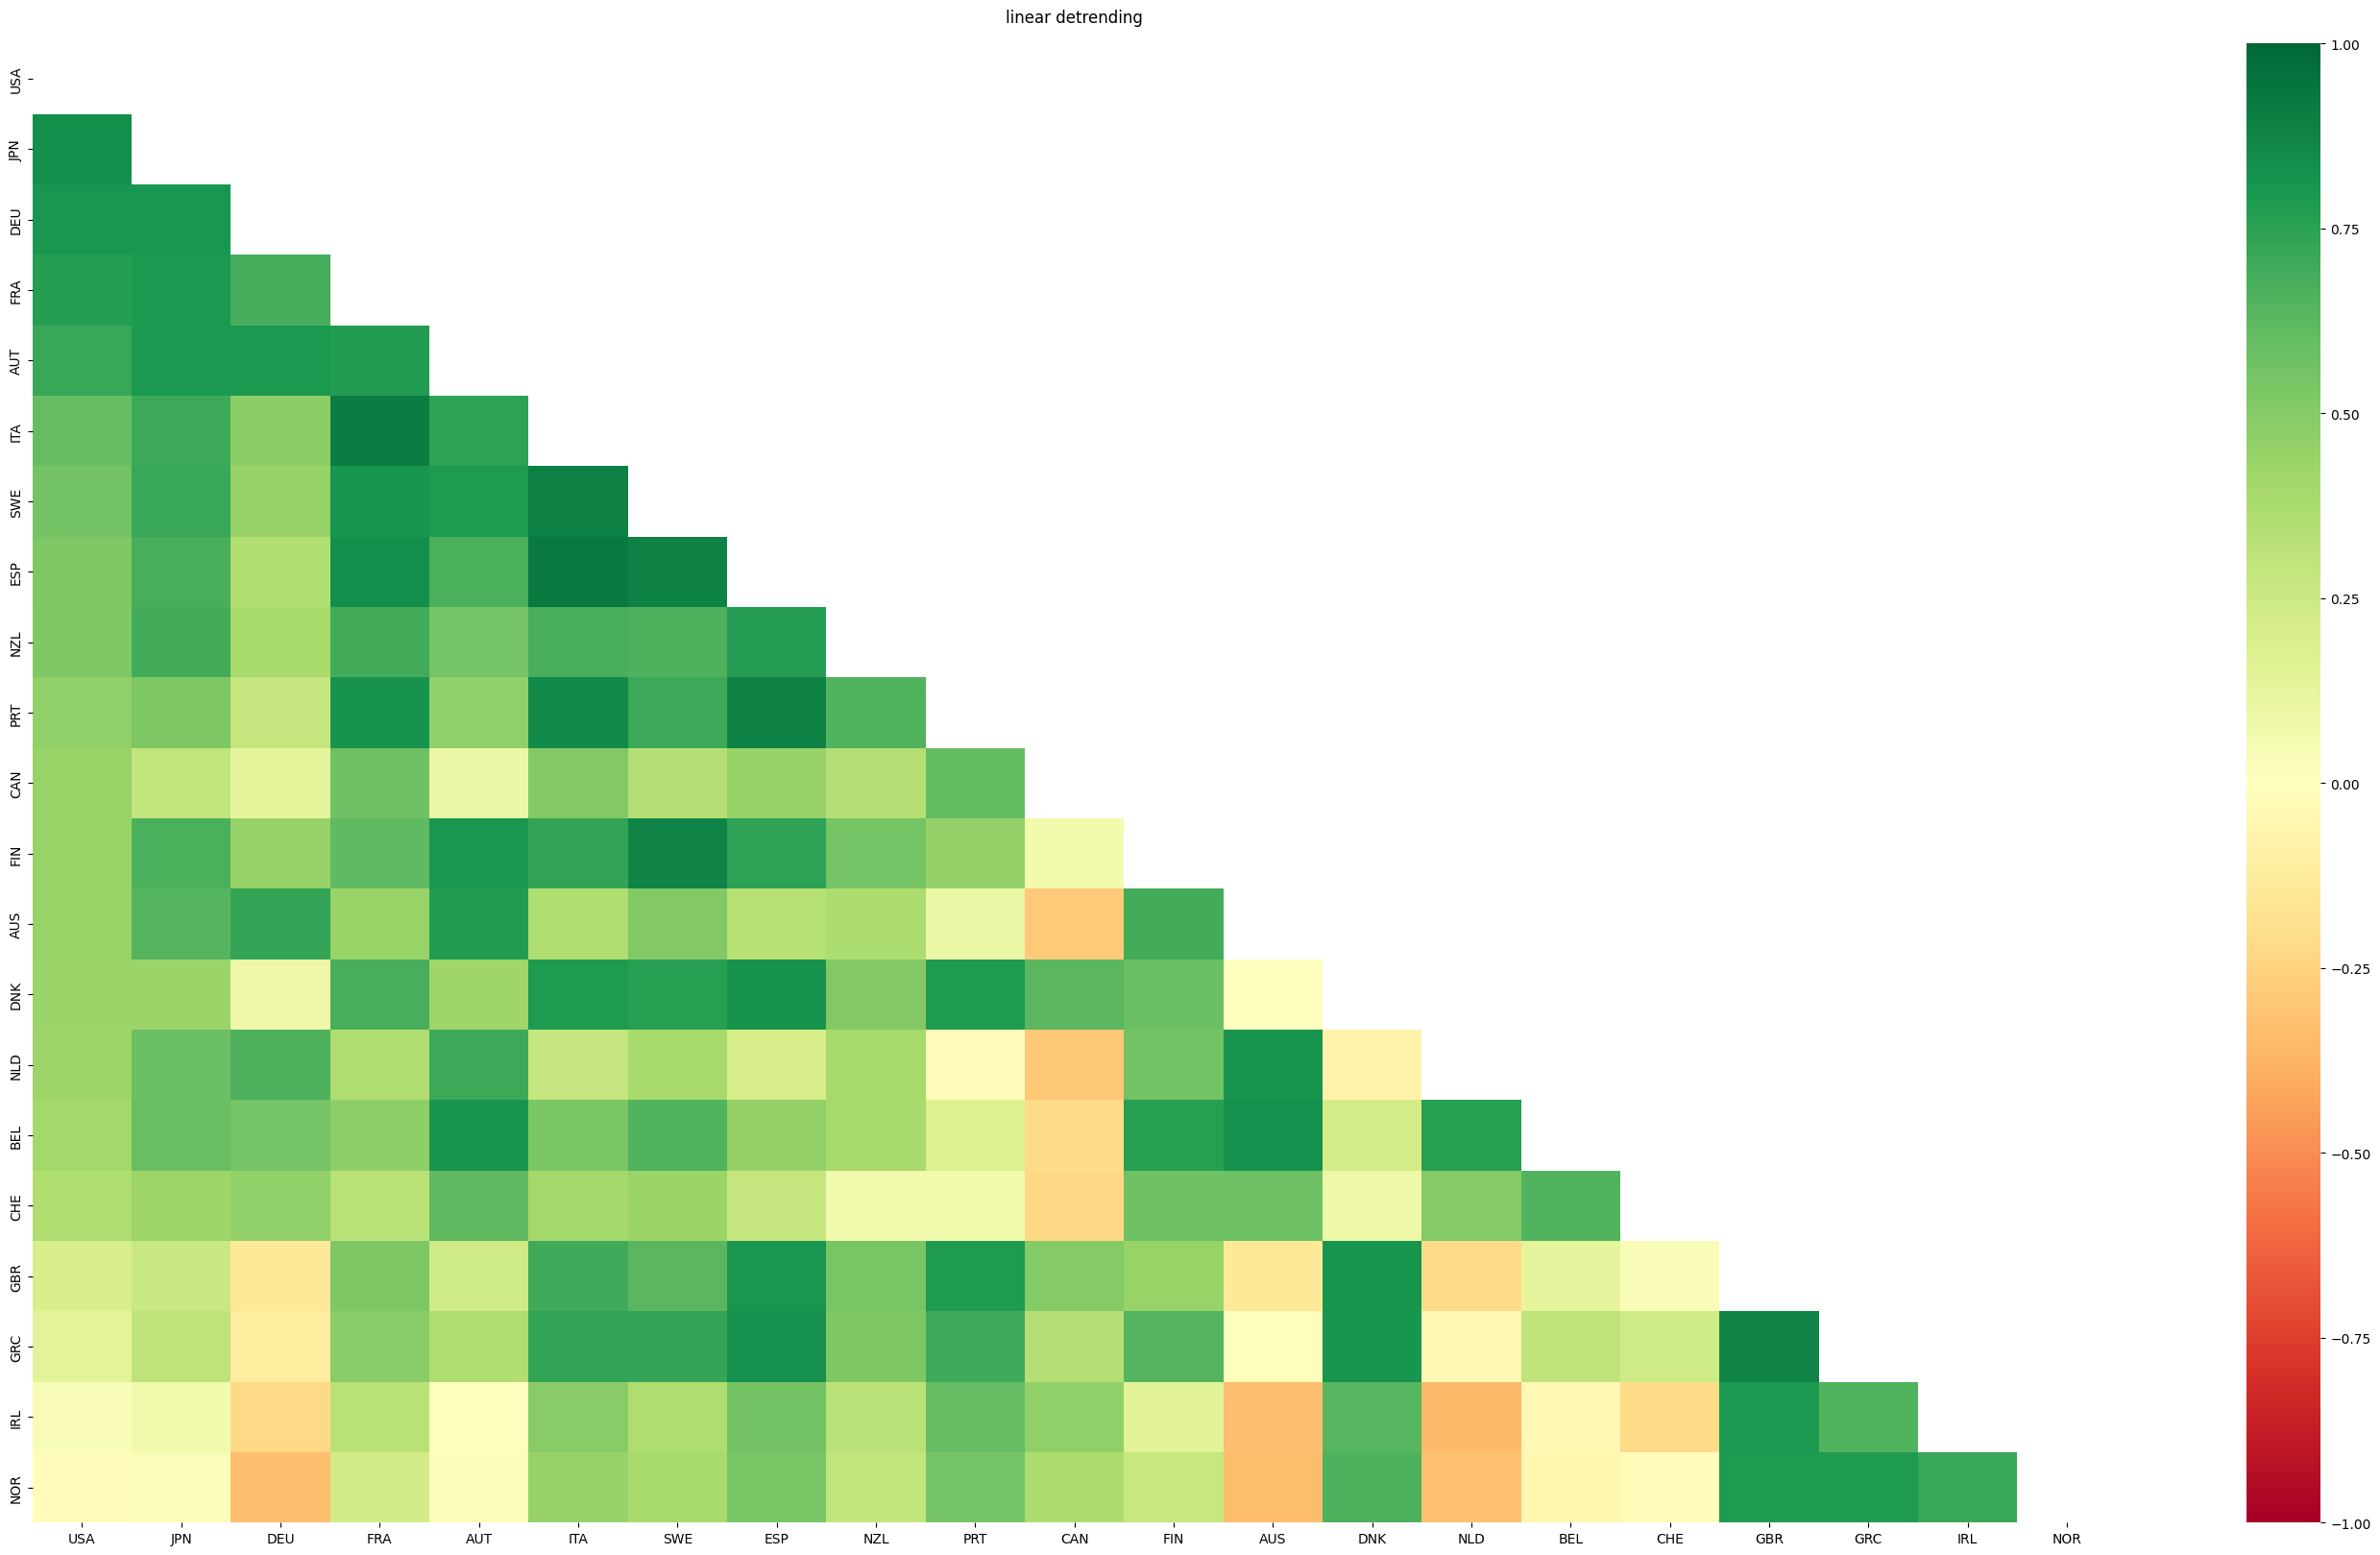

In [23]:
# show the heatmap visualisation

imfipiheatmap = imfipidetrend.get_heatmap()

In [24]:
# show the reshaped version: 

imfipireshaped = imfipidetrend.get_organized()

imfipireshaped.tail()


,iso3_firstcountry,iso3_secondcountry,correlation
376,GBR,IRL,0.792504
377,GBR,NOR,0.784399
397,GRC,IRL,0.654386
398,GRC,NOR,0.786516
419,IRL,NOR,0.718233


## Haver data: real consumption, fourth differences

In [37]:
# seasonally adjusting the consumption series (imf/oecd data are already seasonally adjusted)
rc_sa = pc.SeasonalAdjustment(pc.fixCols(rc, original_countries))

c:\Users\fuem\.conda\envs\myenv\Lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning: WARNING: The covariance matrix of the ARMA parameters is singular,
          so the standard errors and the correlation matrix of the ARMA
          parameters will not be printed out.
  warn(errors, X13Warning)


In [43]:
rc_detrend = pc.Prepare_Correlations(rc_sa, detrending="fourth difference", countries=list(rc_sa.columns)).detrend(start_date="1998-01-01", end_date="2021-12-31")

rc_detrend.data.tail()

,AUS,AUT,BEL,CAN,DNK,FIN,FRA,DEU,GRC,ISL,IRL,ITA,JPN,LUX,NLD,NOR,PRT,ESP,SWE,CHE,GBR,USA,BRA,CHL,HUN,IND,IDN,KOR,MEX,PER,PHL,POL,ZAF,TWN,THA,TUR,CZE
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-01,-0.012572,-0.039522,-0.048952,-0.026744,0.026796,-0.031350,-0.010907,-0.042482,-0.074094,-0.023818,-0.066026,-0.029113,-0.023553,-0.010560,-0.049639,-0.012733,-0.030337,-0.040395,-0.029779,-0.001660,-0.061235,-0.007335,-0.009476,0.024424,-0.046682,0.023457,-0.048802,0.001304,-0.065304,0.004394,-0.059315,-0.019851,-0.036079,0.012530,0.001831,0.059185,-0.066025
2021-01-01,0.129966,0.048677,0.103275,0.128815,0.025155,0.072409,0.111185,0.028271,0.111222,0.095265,0.036050,0.083884,0.059231,0.196527,0.036568,0.053832,0.095390,0.156432,0.070789,0.041178,0.130022,0.122501,0.098234,0.273166,0.066628,0.328757,0.057011,0.001796,0.187932,0.195868,0.104497,0.096916,0.208323,0.054705,0.070660,0.198228,0.007057
2021-04-01,0.066606,-0.038063,-0.024640,0.006596,0.029128,0.014561,-0.044426,-0.043277,0.082239,0.024142,0.070056,0.014353,0.013472,0.008272,0.013126,-0.001487,0.023529,0.012647,0.040125,-0.007084,0.032368,0.064083,0.033972,0.165416,0.048709,-0.064964,0.044875,0.031099,0.087309,0.161081,-0.006075,0.011401,0.048238,-0.050272,-0.023530,0.026754,0.025045
2021-07-01,-0.025996,0.099424,0.103896,0.047659,0.045077,0.033149,0.065223,0.040509,0.073178,0.079029,0.093195,0.068305,-0.007599,0.052047,0.072550,0.062561,0.042705,0.025926,0.064939,0.034839,0.070237,0.060362,0.014193,0.140838,0.047046,-0.036067,-0.003846,0.045477,0.043446,0.043042,0.052399,0.085563,-0.004903,-0.043002,-0.035881,0.079716,0.109082
2021-10-01,0.021031,0.091872,0.086426,0.045585,0.085248,0.039173,0.071569,0.076563,0.064239,0.081703,0.135886,0.078397,0.019320,0.031436,0.099719,0.118603,0.099680,0.066845,0.055241,0.069835,0.111239,0.038734,0.016773,0.122666,0.054018,0.065631,0.001906,0.050582,0.027653,0.037230,0.060160,0.054551,0.012682,-0.008311,0.006399,0.184739,0.090007


In [44]:
# show the correlation matrix

rccorrelations = rc_detrend.get_correlationmatrix()

rccorrelations

,USA,MEX,ESP,GBR,ITA,CAN,SWE,PRT,AUS,FRA,ZAF,LUX,FIN,NLD,IRL,BEL,CHL,AUT,PHL,NOR,POL,CHE,GRC,JPN,DEU,HUN,PER,CZE,IND,ISL,DNK,KOR,TWN,TUR,IDN,BRA,THA
USA,1.000000,0.904197,0.898071,0.895105,0.871472,0.869906,0.843104,0.824185,0.811022,0.806508,0.804468,0.803731,0.787471,0.784426,0.777714,0.776068,0.765257,0.720178,0.718870,0.714707,0.685343,0.676293,0.660940,0.654735,0.642361,0.641792,0.638876,0.632375,0.591651,0.582303,0.534624,0.474680,0.463002,0.454618,0.445744,0.443743,0.393394
MEX,0.904197,1.000000,0.846812,0.876926,0.812991,0.894091,0.794389,0.754069,0.837103,0.738452,0.844285,0.778547,0.807371,0.712050,0.715022,0.776794,0.789986,0.684898,0.788869,0.734210,0.658057,0.670722,0.585542,0.720383,0.619871,0.571395,0.730377,0.594397,0.662133,0.533209,0.517435,0.456727,0.457005,0.437298,0.595783,0.562288,0.444321
ESP,0.898071,0.846812,1.000000,0.899624,0.912829,0.907804,0.820057,0.901562,0.842671,0.883835,0.803655,0.823991,0.833177,0.819536,0.812732,0.804696,0.675634,0.789713,0.773903,0.784532,0.743360,0.760357,0.746998,0.700447,0.721606,0.626077,0.592077,0.715400,0.675828,0.522249,0.558863,0.526201,0.533689,0.353994,0.478559,0.443447,0.416715
GBR,0.895105,0.876926,0.899624,1.000000,0.893901,0.909278,0.833262,0.844727,0.787395,0.872696,0.759142,0.794276,0.787875,0.834893,0.816692,0.886120,0.756870,0.832757,0.842164,0.846777,0.719435,0.839229,0.641626,0.747156,0.788822,0.592520,0.658304,0.730997,0.673341,0.525881,0.557089,0.493966,0.443978,0.424132,0.545900,0.460051,0.423774
ITA,0.871472,0.812991,0.912829,0.893901,1.000000,0.874163,0.868684,0.884117,0.747579,0.905056,0.707331,0.782411,0.768464,0.876885,0.826696,0.887849,0.728571,0.879100,0.764840,0.812702,0.808770,0.823731,0.652744,0.640107,0.783159,0.545052,0.632445,0.794582,0.641186,0.486155,0.545817,0.520850,0.405123,0.427148,0.439142,0.490875,0.325545
CAN,0.869906,0.894091,0.907804,0.909278,0.874163,1.000000,0.845164,0.809559,0.857415,0.890412,0.868577,0.846021,0.812969,0.758180,0.721134,0.888511,0.797333,0.821992,0.836660,0.839596,0.779104,0.784344,0.638120,0.755477,0.725820,0.489618,0.739678,0.657585,0.778442,0.493162,0.492832,0.481191,0.495047,0.485505,0.588311,0.665057,0.438083
SWE,0.843104,0.794389,0.820057,0.833262,0.868684,0.845164,1.000000,0.783781,0.748663,0.778362,0.690124,0.700303,0.710908,0.789815,0.783015,0.810364,0.715159,0.769393,0.711471,0.801391,0.647907,0.723694,0.573210,0.615523,0.671695,0.446015,0.617530,0.657146,0.543204,0.562518,0.514245,0.586005,0.479898,0.496822,0.478092,0.491914,0.272659
PRT,0.824185,0.754069,0.901562,0.844727,0.884117,0.809559,0.783781,1.000000,0.691599,0.828496,0.641056,0.734287,0.729796,0.864314,0.800938,0.783997,0.601361,0.734687,0.669732,0.709253,0.766959,0.732857,0.730468,0.568789,0.689345,0.587190,0.524548,0.726154,0.558482,0.447279,0.542282,0.493987,0.417937,0.346295,0.381950,0.398009,0.283091
AUS,0.811022,0.837103,0.842671,0.787395,0.747579,0.857415,0.748663,0.691599,1.000000,0.695227,0.858678,0.743633,0.768834,0.601113,0.625612,0.656200,0.718889,0.607914,0.723922,0.704236,0.613475,0.628531,0.570931,0.728341,0.532296,0.420427,0.744263,0.460305,0.713037,0.421413,0.386627,0.435056,0.567863,0.390179,0.625643,0.604960,0.447900
FRA,0.806508,0.738452,0.883835,0.872696,0.905056,0.890412,0.778362,0.828496,0.695227,1.000000,0.725191,0.834825,0.733332,0.793942,0.740218,0.915001,0.691713,0.877156,0.751816,0.814664,0.792445,0.869108,0.576341,0.661783,0.811805,0.437676,0.557550,0.671777,0.703008,0.429184,0.473144,0.470995,0.492227,0.449351,0.351907,0.519291,0.424481


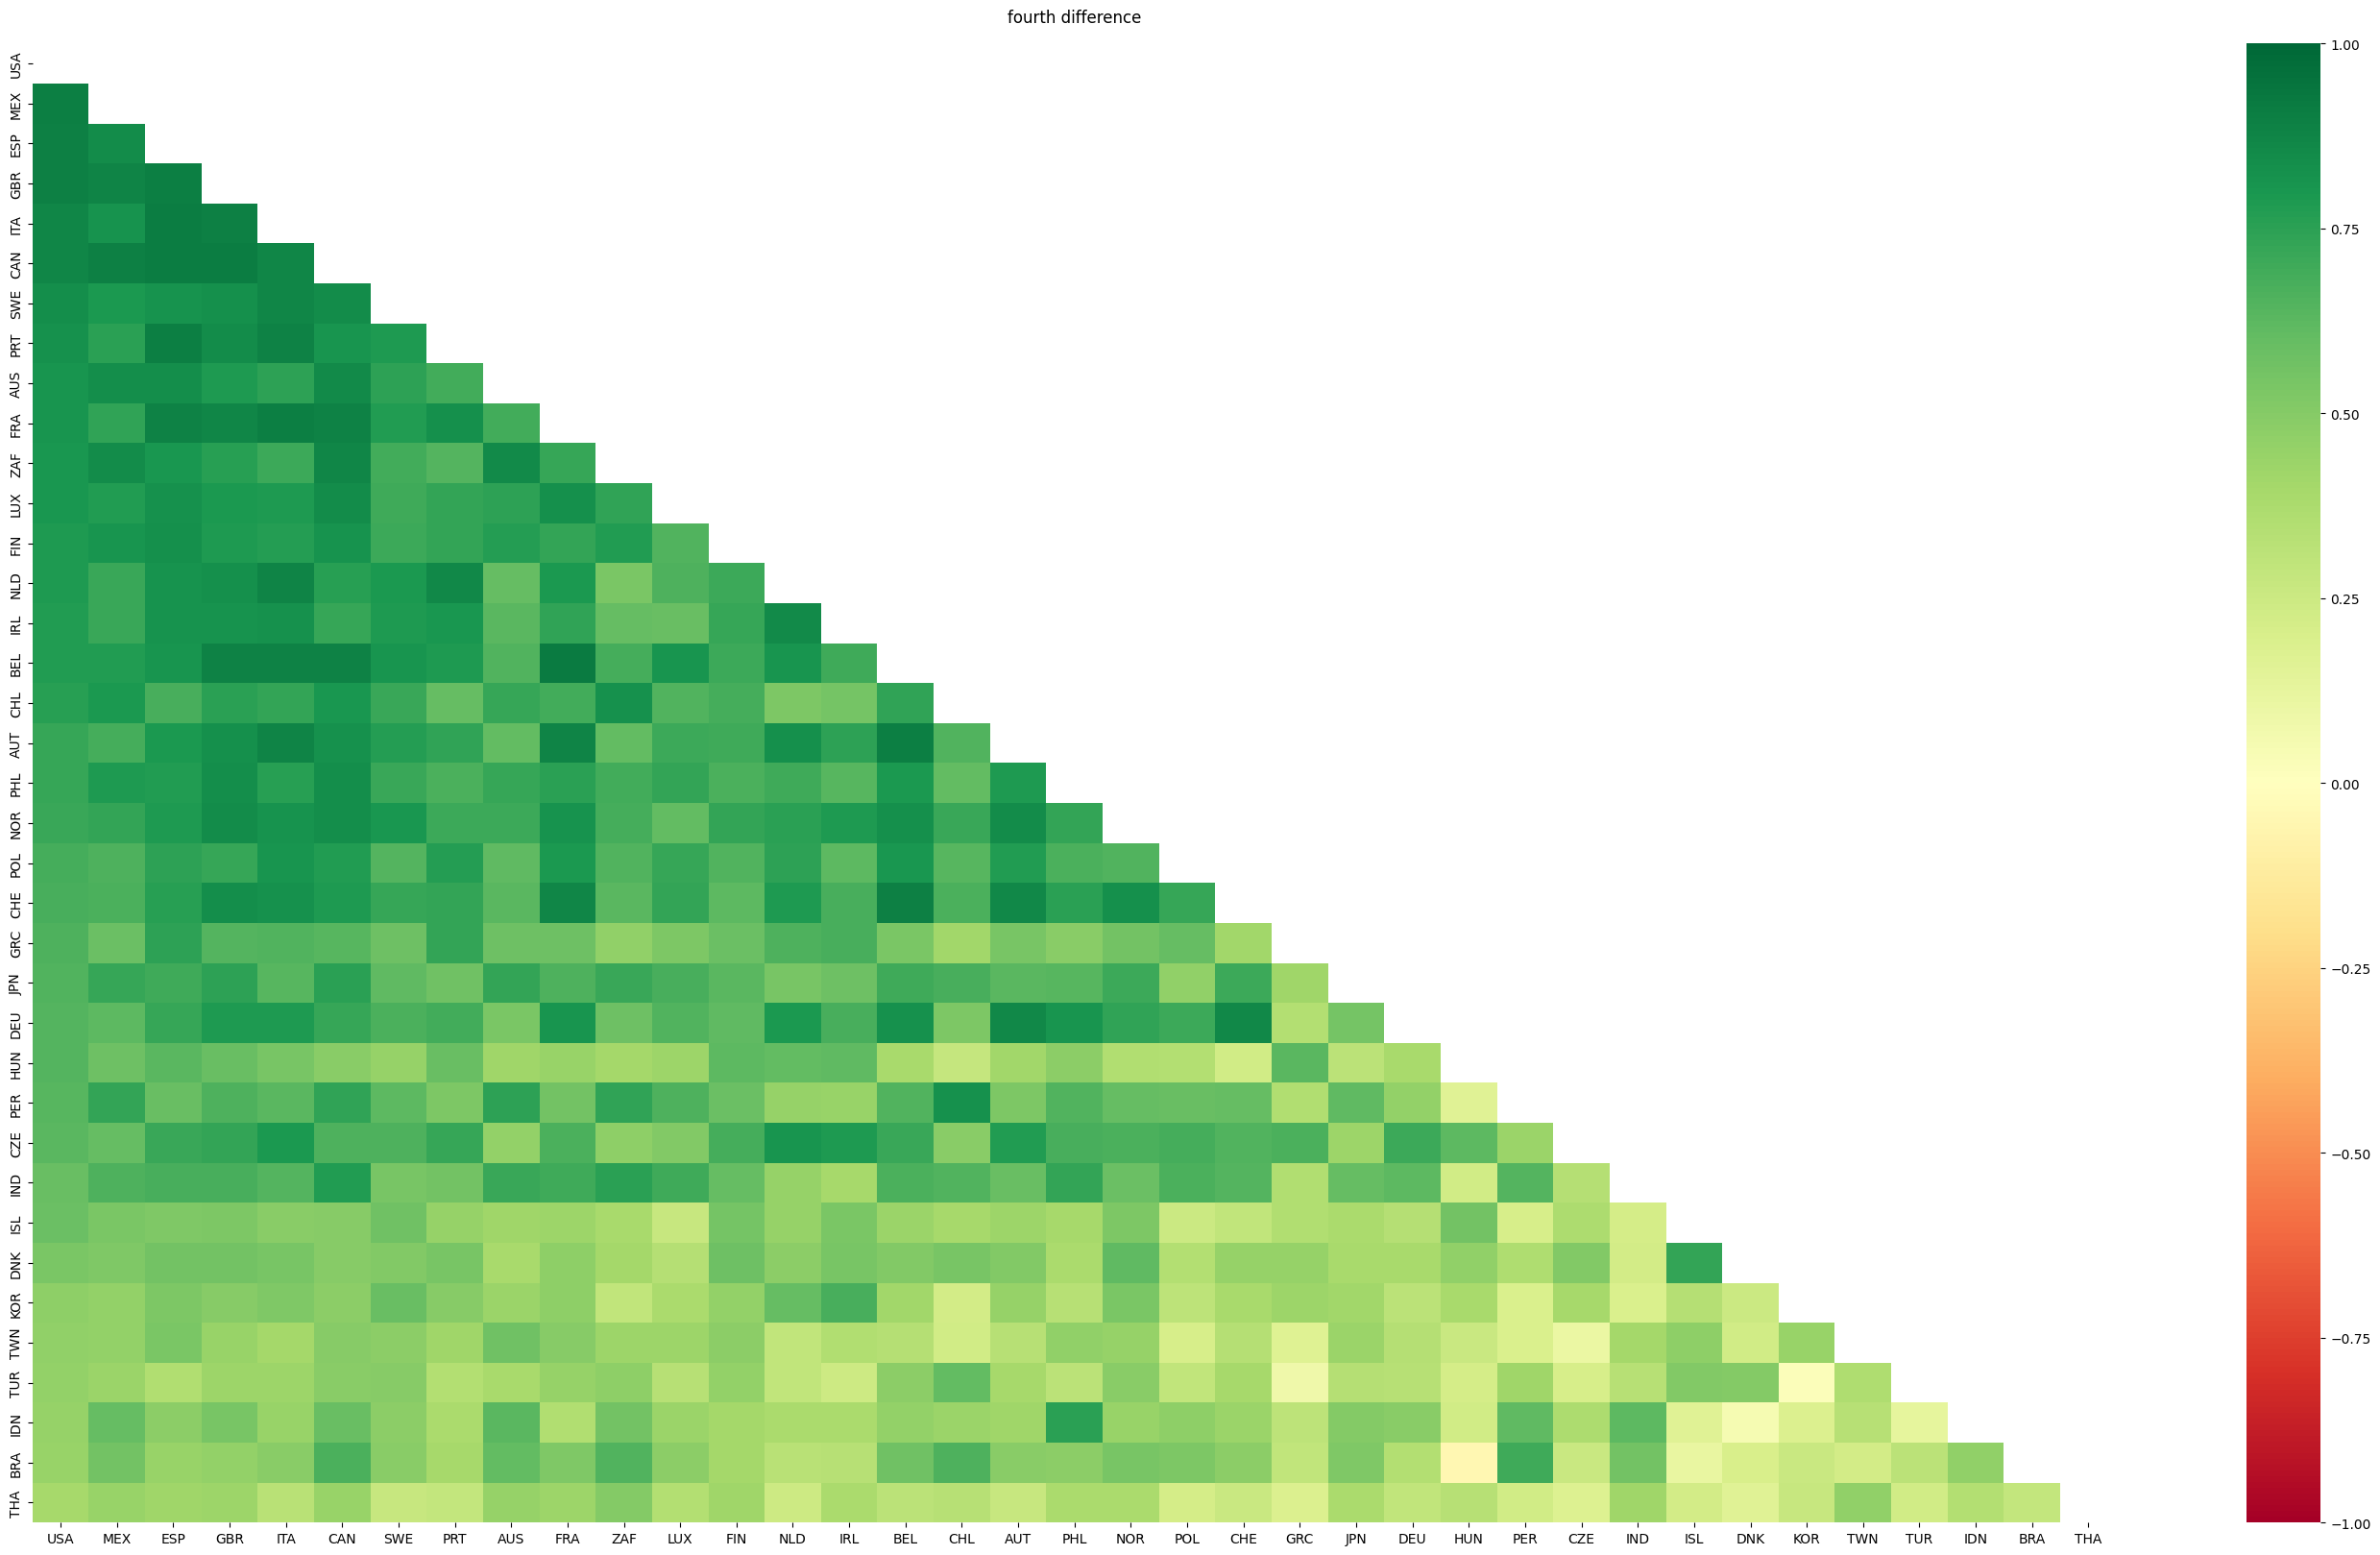

In [45]:

# show the heatmap visualisation

rcheatmap = rc_detrend.get_heatmap()

In [46]:
# show the reshaped version

rcreshaped = rc_detrend.get_organized()

rcreshaped.tail()

,iso3_firstcountry,iso3_secondcountry,correlation
1256,TUR,BRA,0.315745
1257,TUR,THA,0.227169
1293,IDN,BRA,0.466259
1294,IDN,THA,0.344544
1331,BRA,THA,0.282215


# look at some missing values that can cause issues with scipy linear detrending

In [34]:
lookatnansimf = imfipi[list(set(imfipi.columns) & set(frankelrosecountries))]
lookatnansimf = lookatnansimf.loc[(lookatnansimf.index >= pd.to_datetime('1998-01-01', format='%Y-%m-%d')) & (lookatnansimf.index <= pd.to_datetime('2021-12-31', format='%Y-%m-%d'))]

lookatnansimf[lookatnansimf.isna().any(1)]

C:\Users\fuem\AppData\Local\Temp\ipykernel_11332\2327253042.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  lookatnansimf[lookatnansimf.isna().any(1)]


,AUT,DNK,CHE,DEU,BEL,CAN,USA,NLD,NZL,GRC,FIN,ESP,IRL,NOR,FRA,JPN,ITA,AUS,PRT,GBR,SWE
date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,66.118755,102.236210,73.800515,84.826325,71.294644,101.039949,92.451261,81.914914,85.362776,NaN,82.654978,108.585343,51.734178,117.238018,100.424965,100.808097,114.427091,67.916615,111.762827,97.868837,90.301261
1998-04-01,67.042201,101.981494,73.564419,84.972578,71.790391,101.570927,93.067178,82.751631,84.820189,NaN,83.907326,109.496505,51.828354,117.238018,101.791517,97.774200,114.767280,68.744976,113.532586,96.954175,91.533469
1998-07-01,68.076461,111.037223,73.756977,85.228519,71.439237,102.336458,93.757430,82.871639,84.807571,NaN,83.406387,109.465085,55.438445,114.508530,101.291559,96.567537,113.901345,68.322775,113.002572,94.978505,93.428913
1998-10-01,68.002586,96.263688,72.846849,83.912249,70.884964,103.964121,95.116695,82.871639,83.722397,NaN,83.187226,110.784699,55.877935,114.768481,101.924840,95.912491,112.602443,68.571471,113.276717,95.417543,92.930643
1999-01-01,68.187275,103.502188,73.370437,84.277879,70.451185,105.631622,95.806203,84.125047,85.526814,NaN,84.721353,110.470505,59.017145,113.631194,101.724856,97.326011,112.571517,69.556634,115.372403,99.259124,93.065311
1999-04-01,70.440484,100.206085,74.686600,85.082267,71.136280,106.908397,96.733441,84.211719,84.302839,NaN,86.192862,111.161731,58.420695,112.461413,103.224731,97.291535,111.829287,68.320594,116.679161,99.661575,93.361579
1999-07-01,71.326992,100.244102,76.711255,86.142596,72.482372,108.687344,97.599973,85.411791,86.410095,NaN,86.067627,113.109732,63.223686,115.418359,104.224648,98.705055,114.210608,68.908120,115.905463,101.820177,93.795882
1999-10-01,75.353218,108.463450,79.397507,87.202925,73.993712,110.607653,99.324434,86.518524,88.656151,NaN,88.415780,114.837798,65.986190,116.295695,106.557787,100.049622,115.942477,69.324403,117.644761,102.588494,95.492692


In [35]:
lookatnansoecd = oecdemployment[list(set(oecdemployment.columns) & set(frankelrosecountries))]
lookatnansoecd = lookatnansoecd.loc[(lookatnansoecd.index >= pd.to_datetime('1998-01-01', format='%Y-%m-%d')) & (lookatnansoecd.index <= pd.to_datetime('2021-12-31', format='%Y-%m-%d'))]

lookatnansoecd[lookatnansoecd.isna().any(1)]

C:\Users\fuem\AppData\Local\Temp\ipykernel_11332\1990012608.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  lookatnansoecd[lookatnansoecd.isna().any(1)]


,AUT,DNK,CHE,DEU,BEL,CAN,USA,NLD,NZL,GRC,FIN,ESP,IRL,NOR,FRA,JPN,ITA,AUS,PRT,GBR,SWE
date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,NaN,NaN,NaN,NaN,NaN,68.53333,73.76125,NaN,69.64523,55.60656,63.94550,NaN,NaN,NaN,NaN,69.92259,51.63791,67.52502,66.53934,71.27648,NaN
1998-04-01,NaN,NaN,78.04481,NaN,NaN,68.73333,73.85174,NaN,69.02686,55.85064,62.68186,NaN,NaN,NaN,NaN,69.59286,51.87399,67.72710,66.93438,71.27740,NaN
1998-07-01,NaN,NaN,NaN,NaN,NaN,69.06667,73.81985,NaN,68.99280,56.13288,64.54234,NaN,NaN,NaN,NaN,69.45416,52.07743,67.87536,66.79893,71.56174,NaN
1998-10-01,NaN,NaN,NaN,NaN,NaN,69.36667,73.94731,NaN,68.63832,56.21347,64.99767,NaN,NaN,NaN,NaN,69.27718,52.19458,68.03831,67.12978,71.78155,NaN
1999-01-01,68.66560,76.23036,NaN,NaN,59.19458,69.63333,73.98904,NaN,69.25211,56.34367,65.71420,52.92431,NaN,NaN,NaN,69.08689,52.42956,67.99294,67.34690,71.85828,NaN
1999-04-01,68.58568,76.28310,78.42708,NaN,59.02541,69.86667,73.89811,NaN,69.20969,55.80833,66.69583,53.55390,63.08013,NaN,NaN,68.98834,52.60624,68.06283,67.31715,71.88622,NaN
1999-07-01,68.56554,76.19152,NaN,NaN,59.54280,70.13333,73.86938,NaN,69.55880,55.70330,66.33366,54.12680,63.77315,NaN,NaN,69.01920,52.79292,68.26150,67.60715,72.11771,NaN
1999-10-01,68.35089,75.45797,NaN,NaN,59.48914,70.50000,74.02946,NaN,70.19769,55.74428,66.36963,54.76043,64.18932,NaN,NaN,68.99085,52.94587,68.55662,67.77253,72.27470,NaN
2000-01-01,68.46355,76.23196,NaN,NaN,60.07680,70.86667,74.26453,71.81953,70.00667,55.97697,66.33025,55.46640,64.62188,77.42034,NaN,68.75898,53.01252,68.51772,68.13086,72.26537,NaN


In [36]:
lookatnansoecd_u = oecdunemployment[list(set(oecdunemployment.columns) & set(frankelrosecountries))]
lookatnansoecd_u = lookatnansoecd_u.loc[(lookatnansoecd_u.index >= pd.to_datetime('1998-01-01', format='%Y-%m-%d')) & (lookatnansoecd_u.index <= pd.to_datetime('2021-12-31', format='%Y-%m-%d'))]

lookatnansoecd_u[lookatnansoecd_u.isna().any(1)]

C:\Users\fuem\AppData\Local\Temp\ipykernel_11332\4105483854.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  lookatnansoecd_u[lookatnansoecd_u.isna().any(1)]


,AUT,DNK,CHE,DEU,BEL,CAN,USA,NLD,NZL,GRC,FIN,ESP,IRL,NOR,FRA,JPN,ITA,AUS,PRT,GBR,SWE
date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,NaN,NaN,NaN,NaN,NaN,8.633333,4.722629,NaN,7.396619,11.468570,11.556580,NaN,NaN,NaN,NaN,3.833333,11.802680,7.916976,5.948345,6.418485,NaN
1998-04-01,NaN,NaN,3.687753,NaN,NaN,8.433333,4.472419,NaN,8.040760,11.373110,11.685220,NaN,NaN,NaN,NaN,4.233333,12.093640,7.839725,5.242820,6.329114,NaN
1998-07-01,NaN,NaN,NaN,NaN,NaN,8.300000,4.574889,NaN,7.785223,11.451700,11.661170,NaN,NaN,NaN,NaN,4.400000,11.954660,7.856028,5.134938,6.291696,NaN
1998-10-01,NaN,NaN,NaN,NaN,NaN,8.133333,4.425393,NaN,8.040742,11.472540,11.036510,NaN,NaN,NaN,NaN,4.600000,12.079750,7.466487,5.054001,6.202702,NaN
1999-01-01,3.964338,5.420726,NaN,NaN,9.082825,7.933333,4.339256,NaN,7.513777,11.785310,10.427840,16.550450,NaN,NaN,NaN,4.800000,11.786830,7.160043,4.789545,6.234792,NaN
1999-04-01,3.720332,5.484908,3.167246,NaN,9.144972,8.000000,4.290951,NaN,7.461112,12.415580,10.353780,15.852840,6.055307,NaN,NaN,4.933333,11.691530,6.965298,5.141682,6.108781,NaN
1999-07-01,3.609620,5.673514,NaN,NaN,8.331983,7.566667,4.273862,NaN,7.061230,12.401250,10.148900,15.554960,5.574511,NaN,NaN,4.900000,11.553400,6.948481,4.644143,5.933633,NaN
1999-10-01,3.733173,5.843270,NaN,NaN,7.883254,7.066667,4.104529,NaN,6.465258,12.687780,10.173790,15.218340,5.279777,NaN,NaN,4.866667,11.204450,6.731594,4.452120,5.860498,NaN
2000-01-01,4.008713,5.016977,NaN,NaN,7.288741,6.800000,4.087547,3.220637,6.509148,11.941690,10.536480,14.533450,4.859990,3.373215,NaN,5.000000,11.243720,6.716942,4.452434,5.852907,NaN


In [ ]:
# look at what imf series are available